# BIG DATA APPLICATION FOR NETWORK LEVEL TRAVEL TIME PREDICTION



Let's Get Started!

In [1]:
import numpy as np 
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Section 1: Data Loading and Preprocessing
The dataset we will be using is collected from Caltrans Performance Measurement System
(PeMS), an online system that collects real-time traffic data across all major metropolitan areas of California from over 39,000 individual detectors. 

The data used in this project is 4 years from August 1st, 2017 to Oct 31th, 2021 at a 5-min time frequency.

The PeMS website has restrictions on the amount of travel time data you can fetch every time. Manually downloading the large dataset will take weeks to complete. We developed a Web Scraping tool to automate the data acquisition process. A log file is used to track how many corridors has been successfully downloaded.

The raw data size is over 4G, containing aggregated travel time and travel time for each lane. To make the data loading and process more efficient, we only keep the aggregated travel time and removed lane-level travel time data. This reduced the data size to about 2G.

## 1.2 Data Description

In [3]:
# read the CSV file 
travel_time = pd.read_csv('/content/drive/MyDrive/CIS 545 Project Folder/Data Set/2021_travel_time.csv')

In [4]:
travel_time.head(5)

,corridor_id,corridor_name,direction,5 Minutes,Mainline Agg,Mainline Speed
0,4666,13: Alameda I-80,I80-E,2021-01-27 00:00:00,18.05,67.147
1,4666,13: Alameda I-80,I80-E,2021-01-27 00:05:00,18.05,67.147
2,4666,13: Alameda I-80,I80-E,2021-01-27 00:10:00,18.28,66.302
3,4666,13: Alameda I-80,I80-E,2021-01-27 00:15:00,18.32,66.157
4,4666,13: Alameda I-80,I80-E,2021-01-27 00:20:00,18.28,66.302


In [5]:
# drop NA values 
travel_time.dropna(inplace = True)

In [10]:
travel_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6524922 entries, 0 to 6524921
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   corridor_id     int64  
 1   corridor_name   object 
 2   direction       object 
 3   5 Minutes       object 
 4   Mainline Agg    float64
 5   Mainline Speed  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 348.5+ MB


## 1.3 Traffic Detector Geospatial Map

In [ ]:
import chart_studio.plotly as py
import chart_studio.tools as tl
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CIS 545 Project Folder/Data Set/bay_sensor_locations.csv')

tl.set_credentials_file(username='aschrock', api_key='CWwy1WgujKrPK4Z1J0Oh')

# Add Mapbox access token here 

mapbox_access_token = 'pk.eyJ1IjoiYXNjaHJvY2siLCJhIjoiY2p2NnRoeHc2MDkxbTQ0bnR6aTVwZDNsaCJ9.MA76hkxD3rOGgnVCDBVC9w'

# Save latitude and longitude as variables. In this dataset, the X column is longitude and the Y column is latitude. 

site_lat = df.lat
site_lon = df.lon
locations_name = df.id.to_string()

# Generate the data for the map 

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]


# Generate a layout around Los Angeles, zoomed in so we can see the data points 

layout = go.Layout(
    title='District 4 Traffic Sensors Locations',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.3382082,
            lon=-121.8863286
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)
	
# Generate the figure using the iplot function 
  
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='District 4 Traffic Sensors')

# Section 2 : EDA and Visualization

### 2.1 Split datatime feature 

Split '5 Minutes' featue into date, time, year, month, and day of week.

### 2.2 Compute statistics 

Compute some statistics of 'Mainline Agg', like max, min, mean, and standard deviation， and plot the distribution of average travel time.

In [ ]:
max = travel_time_hourly['Mainline Agg'].max()
min = travel_time_hourly['Mainline Agg'].min()
mean = travel_time_hourly['Mainline Agg'].mean()
std = travel_time_hourly['Mainline Agg'].std() 
print('max time: %d' %max)
print('min time: %d' %min)
print('mean time : %d' %mean)
print('standard deviation : %d' %std)

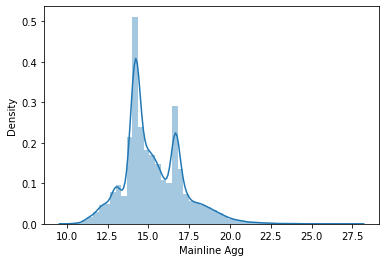

In [ ]:
sns.distplot(travel_time_hourly['Mainline Agg'])

We can see that the average travel time is distributed between 14 minutes and 16 minutes.

###2.3 Day of week analysis

Next, we'd like to analyze the variance of travel time during the week to see how travel time varies on different days. We will also plots max, mean, and min travel time during the week.

In [ ]:
# group the data by Weekday
data_by_week = travel_time_hourly.groupby('Weekday')['Weekday','Mainline Agg']

In [ ]:
# calculate the maximum, mean, and minimum travel time during the week
weekday_max = data_by_week.max()
weekday_mean = data_by_week.mean()
weekday_min = data_by_week.min()

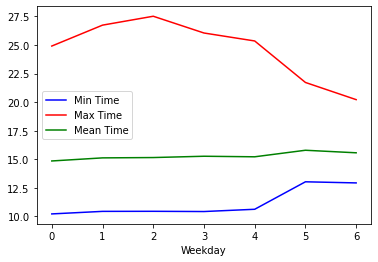

In [ ]:
# visualize the above three charts in one
ax = plt.gca()
weekday_min.plot(kind = 'line', y = 'Mainline Agg', color = 'blue',ax = ax,label='Min Time')
weekday_max.plot(kind = 'line', y = 'Mainline Agg', color = 'red',ax = ax, label='Max Time')
weekday_mean.plot(kind = 'line', y = 'Mainline Agg', color = 'green',ax = ax,label='Mean Time')


We can tell that people spend most travel time between Thurday and Friday, and the average traffic is worst on Friday.

###2.4 Time of day analysis

Last, let's analyze the travel time at an hour interval of a day. We want to visualize if the travel time varies greatly during a day as we expect.

In [ ]:
# group the data by time
data_by_time = travel_time_hourly.groupby('Time')['Time','Mainline Agg']

In [ ]:
# calculate the maximum, mean, and minimum travel time of a day
time_max = data_by_time .max()
time_mean = data_by_time .mean()
time_min = data_by_time .min()

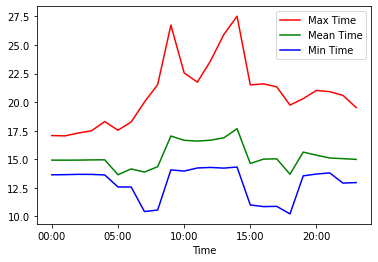

In [ ]:
# visualize the above three charts in one
ax = plt.gca()
time_max.plot(kind = 'line', y = 'Mainline Agg', color = 'red',ax = ax, label='Max Time')
time_mean.plot(kind = 'line', y = 'Mainline Agg', color = 'green',ax = ax,label='Mean Time')
time_min.plot(kind = 'line', y = 'Mainline Agg', color = 'blue',ax = ax,label='Min Time')

From the plots, we can see that the peak traffic periods of a day are between 7:00AM and 12:00PM, and between 6:00PM and 9:00PM.

In [ ]:
# Group the data by time and calculate the mean travel time for each day
Monday = travel_time_hourly[ travel_time_hourly['Weekday'] == 0].groupby('Time')['Time','Mainline Agg'].mean()
Tuesday = travel_time_hourly[ travel_time_hourly['Weekday'] == 1].groupby('Time')['Time','Mainline Agg'].mean()
Wednesday = travel_time_hourly[ travel_time_hourly['Weekday'] == 2].groupby('Time')['Time','Mainline Agg'].mean()
Thursday = travel_time_hourly[ travel_time_hourly['Weekday'] == 3].groupby('Time')['Time','Mainline Agg'].mean()
Friday = travel_time_hourly[ travel_time_hourly['Weekday'] == 4].groupby('Time')['Time','Mainline Agg'].mean()
Saturday = travel_time_hourly[ travel_time_hourly['Weekday'] == 5].groupby('Time')['Time','Mainline Agg'].mean()
Sunday = travel_time_hourly[ travel_time_hourly['Weekday'] == 6].groupby('Time')['Time','Mainline Agg'].mean()

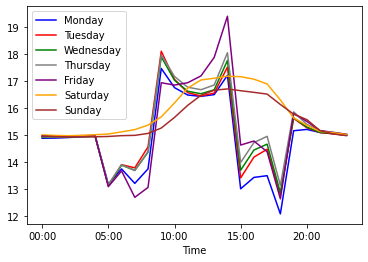

In [ ]:
# plots the line charts of the mean travel time of an individual day during the week 
ax = plt.gca()
Monday.plot(kind = 'line', y = 'Mainline Agg', color = 'blue',ax = ax, label='Monday')
Tuesday.plot(kind = 'line', y = 'Mainline Agg', color = 'red',ax = ax, label='Tuesday')
Wednesday.plot(kind = 'line', y = 'Mainline Agg', color = 'green',ax = ax, label='Wednesday')
Thursday.plot(kind = 'line', y = 'Mainline Agg', color = 'gray',ax = ax, label='Thursday')
Friday.plot(kind = 'line', y = 'Mainline Agg', color = 'purple',ax = ax, label='Friday')
Saturday.plot(kind = 'line', y = 'Mainline Agg', color = 'orange',ax = ax, label='Saturday')
Sunday.plot(kind = 'line', y = 'Mainline Agg', color = 'brown',ax = ax, label='Sunday')

The plots show that the travel time vary greatly in a day during weekdays, especially on Friday. However,the plots of Saturday and Sunday are more smooth, which mean that the travel time of a day during weekends is more consistent.

When we reduce the dimensionality of our features to 35 using pca and train a linear regression model,  we can see that the rmse on the test set is almost the same as the rmse using  linear regression model without PCA. 


#Time Series Modeling


## First, let's look at the overall trend
I resample the dataset to daily data and perform Augmented Dickey Fuller Test to test whether the time series is stationary.

In [ ]:
from datetime import datetime
#travel_time['datetime'] = travel_time['5 Minutes'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
#ts = travel_time[['datetime','Mainline Agg']].set_index('datetime')
ave_by_date = time_series['Mainline Agg'].resample('D').mean()
ave_by_date.dropna(inplace=True)
ave_by_date.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationairty(timeseries, lag):
  rolling_mean = pd.Series.rolling(timeseries,center=False,window=12).mean()
  rolling_std = pd.Series.rolling(timeseries,center=False,window=12).std()
  plt.figure(figsize=(12,6))
  plt.plot(timeseries, color='green', label='average travel time')
  plt.plot(rolling_mean, color='red', label='rolling_mean')
  plt.plot(rolling_std, color='orange', label='rolling_std')
  plt.xticks(fontsize=14, rotation=45)
  plt.yticks(fontsize=14)
  plt.ylabel('Travel Time', fontsize=16)
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation', fontsize=20)

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, maxlag = lag, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','%Lags Used','Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -0.666063
p-value                           0.855345
%Lags Used                       42.000000
Number of Observations Used    1434.000000
Critical Value (1%)              -3.434918
Critical Value (5%)              -2.863558
Critical Value (10%)             -2.567844
dtype: float64


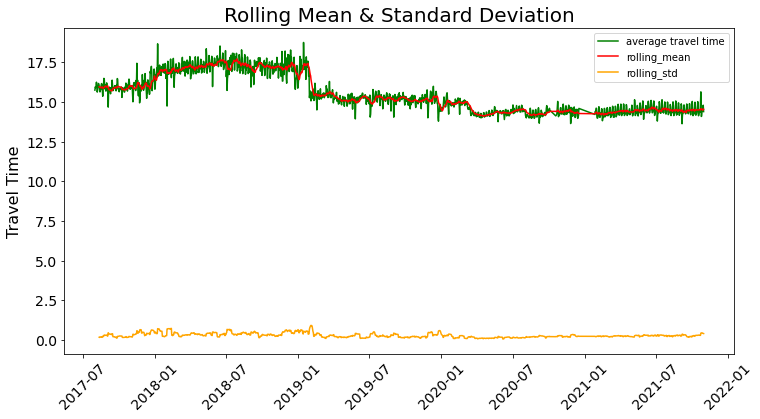

In [ ]:
test_stationairty(ave_by_date, 365)

Observations: We can tell from both overall trend and rolling average that there is a big jump of travel time in around Mar 2019. We assume that people starts to WFH since Mar 2019 because of the outbreak of Covid-19 in the US. Also, from the Dickey-fuller Test, we can see that our test statistic is -0.666 and is well below critical value thresholds for any level of confidence. Therefore, we conclude with fairly high confidence that there exists regime changes in our dataset. 

##4.2 Second let's look at our monthly data.

We will take a look at year 2020 particularly since this year contains all 12 months post-covid data(2021 has 10 months data) which might be more similar to current situation.

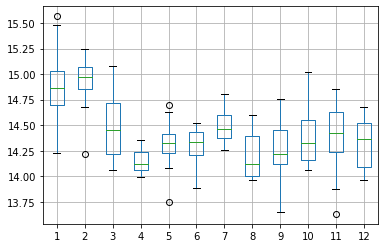

In [ ]:
groups = ave_by_date['2020'].groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()

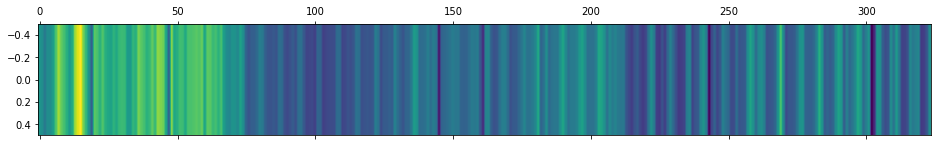

In [ ]:
groups = ave_by_date['2020'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')

In [ ]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(ave_by_date['2020'], maxlag = 12, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','%Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.748532
p-value                          0.406297
%Lags Used                       6.000000
Number of Observations Used    317.000000
Critical Value (1%)             -3.451148
Critical Value (5%)             -2.870701
Critical Value (10%)            -2.571651
dtype: float64


Observations: When we compare the month to month average travel time for year 2020 via above boxplot and heatmap, we can see that during Januray and Feburary, people spent more time on the road on average. The reason might be that people are more willing to drive instead of take public transportation during cold weather. And the most variable month is March. From the Dickey-Fuller Test over monthly data, the test statistic is -1.7485, again does not meet the critical value thresholds at any confidence level. We conclude that the null hypothesis probably holds and the monthly seasonality exsits.

##4.3 Autocorrelation

We assume there will be very high autocorrelation in our data because traffic conditions 5 minutes ago will mostly likely affect the current travel time. We calculate autocorrelation and partial autocorrelation using data on 2021-10-01. We detect strong autocorrelation in our data from the following plots. We can tell that the previous travel time influences the current travel time, but the significance of that influence decreases and slightly increases based on the 
visualization along with the travel time with regular time intervals.

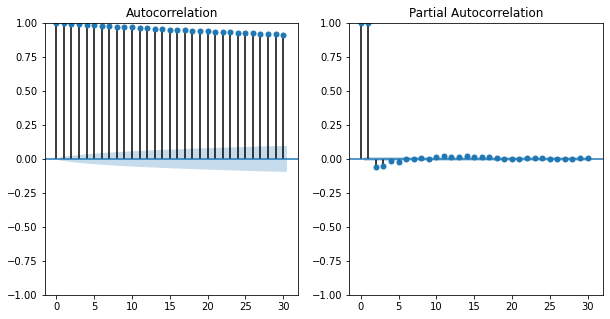

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ts211001 = time_series['Mainline Agg']['2021-10-01']
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(ts211001, lags=30, ax=ax[0])
plot_pacf(ts211001, lags=30, ax=ax[1])
plt.show()

##4.4 Remove trends and seasonality

### 4.4.1 Log Series Analysis

We are trying to remove overall trends and seasonality. First, let's try log series analysis, here we compute the log of the travel time and run it through the ADF test. There is less of trend in terms of the slope of average line. However, the test statistic -0.716 compared to -0.666 of the raw data suggests that taking log does not help a lot in respect of removing trends.

Results of Dickey-Fuller Test:
Test Statistic                   -0.716240
p-value                           0.842498
%Lags Used                       42.000000
Number of Observations Used    1434.000000
Critical Value (1%)              -3.434918
Critical Value (5%)              -2.863558
Critical Value (10%)             -2.567844
dtype: float64


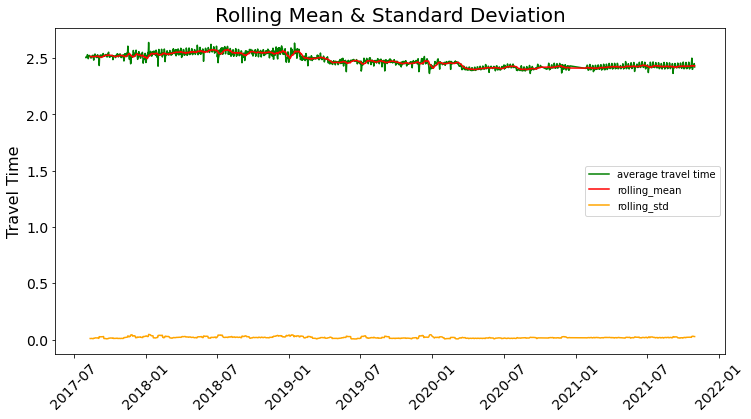

In [ ]:
import math
time_series['log_travel_time'] = time_series['Mainline Agg'].apply(math.log)
log_ts = time_series['log_travel_time'].resample('D').mean()
log_ts.dropna(inplace=True)
test_stationairty(log_ts, 365)

###4.4.2 Simple Moving Average
Next, we compute a moving average and subtract that off from the log value. Then we apply ADF test over the data, the test statistic of -9.788 falls well below the critical value for all three confidence levels. We can probably say that we have dampened the overall trend and now we have a stationary time series distribution.

Results of Dickey-Fuller Test:
Test Statistic                -9.788324e+00
p-value                        6.453561e-17
%Lags Used                     2.800000e+01
Number of Observations Used    1.437000e+03
Critical Value (1%)           -3.434909e+00
Critical Value (5%)           -2.863553e+00
Critical Value (10%)          -2.567842e+00
dtype: float64


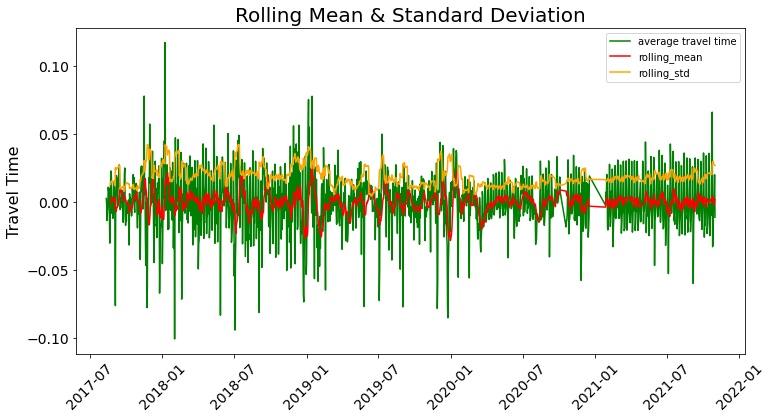

In [ ]:
moving_avg = pd.Series.rolling(log_ts, center=False, window=12).mean()
moving_avg_diff = log_ts - moving_avg
moving_avg_diff.dropna(inplace=True)
test_stationairty(moving_avg_diff, 365)

###4.4.3 Exponential Moving Average

We also try the exponential moving average and subtract it off from the log value. We then run the ADF test, the test statistic of -5.42 compared to SMA's test statistic of -9.788 makes SMA a better approach in terms of removing trends.

Results of Dickey-Fuller Test:
Test Statistic                   -5.424695
p-value                           0.000003
%Lags Used                       42.000000
Number of Observations Used    1434.000000
Critical Value (1%)              -3.434918
Critical Value (5%)              -2.863558
Critical Value (10%)             -2.567844
dtype: float64


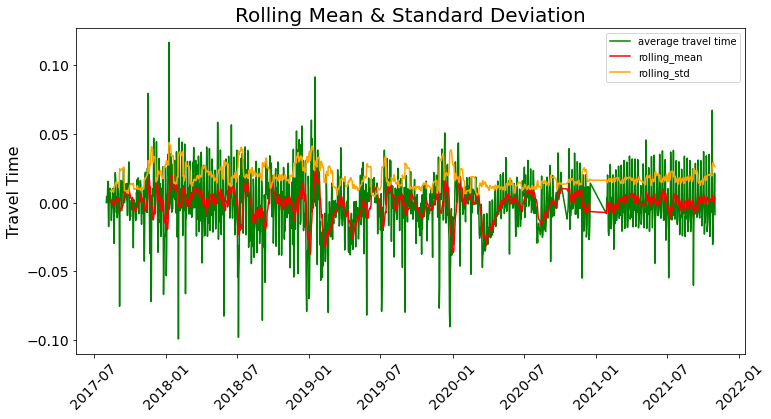

In [ ]:
expweighted_avg = pd.Series.ewm(log_ts, ignore_na=False, adjust=True, halflife=12, min_periods=0).mean()
expweighted_avg_diff = log_ts - expweighted_avg
expweighted_avg_diff.dropna(inplace=True)
test_stationairty(expweighted_avg_diff, 365)

## 4.5 Implementation of Models to Make Prediction

In [8]:
travel_time_df = pd.read_csv('/content/drive/MyDrive/CIS 545 Project Folder/Data Set/2021_travel_time.csv')
corridor_file = "/content/drive/MyDrive/CIS 545 Project Folder/Data Set/pems_district4_corridors.xlsx"
corridor_df = pd.read_excel(corridor_file)

begin_time = datetime.strptime('2021-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
travel_time_df['datetime'] = travel_time_df['5 Minutes'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
travel_time_df.drop(columns=['5 Minutes', 'Mainline Speed','corridor_name', 'direction'], axis=1, inplace = True)

travel_time_df

,corridor_id,Mainline Agg,datetime
0,4666,18.05,2021-01-27 00:00:00
1,4666,18.05,2021-01-27 00:05:00
2,4666,18.28,2021-01-27 00:10:00
3,4666,18.32,2021-01-27 00:15:00
4,4666,18.28,2021-01-27 00:20:00
...,...,...,...
6524917,22221,25.60,2021-10-31 23:35:00
6524918,22221,25.82,2021-10-31 23:40:00
6524919,22221,25.73,2021-10-31 23:45:00
6524920,22221,25.60,2021-10-31 23:50:00


###4.5.1 ARIMA Model

I select travel time from corridor 13: Alameda I-80I in October 2021 as our sample data, resample it to hourly data and split it into traning and testing dataset. I use the auto_arima() from pmdarima package, which is a stepwise approach to search multiple combinations of p,d,q parameters and choose the best model that has the least AIC.

In [ ]:
data = travel_time[travel_time['corridor_name'] == '13: Alameda I-80'][['5 Minutes','Mainline Agg']].set_index('5 Minutes')
data = data['Mainline Agg'].resample('H').mean()['2021-10'].dropna()
train = data[:475]
test = data[475:]
data

In [ ]:
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=7,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1971.417, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4207.768, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3596.220, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1968.358, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3137.329, Time=0.66 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1970.229, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1969.741, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2871.141, Time=0.77 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1961.277, Time=0.55 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1947.556, Time=0.92 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1955.442, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1898.217, Time=1.46 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1

It turns out the best model is ARIMA(2,0,3), the coefficients of almost all terms except the MA2 term are highly significant according to the P-Value in ‘P>|z|’ column. Now let’s review the residual plots.

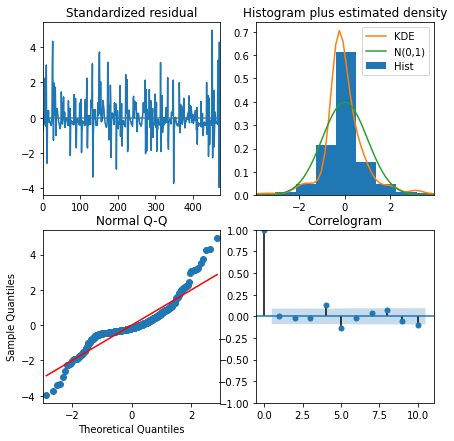

In [ ]:
model.plot_diagnostics(figsize=(7,7))
plt.show()

Observations: Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
Top Right: The density plot suggests normal distribution with mean zero.
Bottom left: The dots mostly fall in line with the red line. There are some deviations that implies the distribution might have light tails.
Bottom Right: The ACF plot shows the residual errors are not autocorrelated until the 4th lag.

In [ ]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
index_of_fc = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

I use the trained model to predict the next 50 values. From the chart, the ARIMA(2,0,3) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That looks good.

In [ ]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

In [11]:
travel_time_df = pd.read_csv('/content/drive/MyDrive/CIS 545 Project Folder/Data Set/2021_travel_time.csv')
corridor_file = "/content/drive/MyDrive/CIS 545 Project Folder/Data Set/pems_district4_corridors.xlsx"
corridor_df = pd.read_excel(corridor_file)

begin_time = datetime.strptime('2021-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
travel_time_df['datetime'] = travel_time_df['5 Minutes'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
travel_time_df.drop(columns=['5 Minutes', 'Mainline Speed','corridor_name', 'direction'], axis=1, inplace = True)

corridor_ids = travel_time_df.corridor_id.unique()


In [13]:
corridor_ids

array([ 4666,  4667,  4668,  4669,  4670,  4671,  4672,  4674,  4675,
        4676,  4677,  4678,  4679,  4680,  4681, 15272, 15274, 15292,
       15294, 15348, 15350, 15354, 15356, 15358, 15368, 15370, 15376,
       15378, 15380, 15382, 15456, 15458, 15488, 15490, 15520, 15522,
       15532, 15534, 15536, 15538, 15556, 15558, 15560, 15562, 15564,
       15566, 15688, 15690, 16048, 16050, 16068, 16070, 16072, 16074,
       20035, 20037, 20139, 20141, 22040, 22041, 22136, 22137, 22138,
       22139, 22142, 22143, 22146, 22147, 22148, 22149, 22150, 22151,
       22166, 22167, 22168, 22169, 22170, 22171, 22175, 22176, 22190,
       22191, 22194, 22195, 22196, 22197, 22198, 22199, 22204, 22205,
       22208, 22209, 22210, 22211, 22212, 22220, 22221])

In [16]:
travel_time_df = travel_time_df.rename(columns={"Mainline Agg": "Mainline_tt"})
travel_time_df

,corridor_id,Mainline_tt,datetime
0,4666,18.05,2021-01-27 00:00:00
1,4666,18.05,2021-01-27 00:05:00
2,4666,18.28,2021-01-27 00:10:00
3,4666,18.32,2021-01-27 00:15:00
4,4666,18.28,2021-01-27 00:20:00
...,...,...,...
6524917,22221,25.60,2021-10-31 23:35:00
6524918,22221,25.82,2021-10-31 23:40:00
6524919,22221,25.73,2021-10-31 23:45:00
6524920,22221,25.60,2021-10-31 23:50:00


## 15 Minute

In [34]:
import pmdarima as pm
from statsmodels.tsa.stattools import acf
import random
from IPython.display import clear_output

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

all_corridors_evaluations = []

n_periods = 3
train_size = 48
train_samples = 50

for corridor_id in corridor_ids:

    data = travel_time_df[travel_time_df['corridor_id'] == corridor_id]["Mainline_tt"].dropna()

    length = data.size
    true_value = []
    predict_value = []
    
    for i in range(train_samples):
    
      split_idx = random.randint(0, round(length - train_size - 20))

      train = data[split_idx : split_idx + train_size] 
      test = data[split_idx + train_size : split_idx + train_size + n_periods]

      try:

        model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=7,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        

      except:
        continue
      
      clear_output(wait=True)
      fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
      predict_value.append(fc[train_size + n_periods -1])
      true_value.append(test.values[-1])

    evaluations = forecast_accuracy(np.array(predict_value), np.array(true_value))
    all_corridors_evaluations.append([corridor_id, evaluations["rmse"] , evaluations["mae"], evaluations["mape"]])

df = pd.DataFrame(all_corridors_evaluations, columns =['corridor_id',  'rmse', 'mae', 'mape'])
df = df.loc[~(df==0).all(axis=1)]
df.to_csv("/content/drive/MyDrive/CIS 545 Project Folder/Data Set/ARIMA_records_15min.csv")
df[['rmse', 'mae', 'mape']].mean(axis=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


rmse    0.816355
mae     0.331040
mape    0.022794
dtype: float64

In [35]:
import pmdarima as pm
from statsmodels.tsa.stattools import acf
import random

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

all_corridors_evaluations = []

n_periods = 6
train_size = 48

train_samples = 50

for corridor_id in corridor_ids:

    data = travel_time_df[travel_time_df['corridor_id'] == corridor_id]["Mainline_tt"].dropna()

    length = data.size
    true_value = []
    predict_value = []
    
    for i in range(train_samples):
    
      split_idx = random.randint(0, round(length - train_size -20))

      train = data[split_idx : split_idx + train_size] 
      test = data[split_idx + train_size : split_idx + train_size + n_periods]

      try:

        model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=7,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        

      except:
        continue
        
      clear_output(wait=True)
      fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
      predict_value.append(fc[train_size + n_periods -1])
      true_value.append(test.values[-1])

    evaluations = forecast_accuracy(np.array(predict_value), np.array(true_value))
    all_corridors_evaluations.append([corridor_id, evaluations["rmse"] , evaluations["mae"], evaluations["mape"]])

df = pd.DataFrame(all_corridors_evaluations, columns =['corridor_id',  'rmse', 'mae', 'mape'])
df = df.loc[~(df==0).all(axis=1)]
df.to_csv("/content/drive/MyDrive/CIS 545 Project Folder/Data Set/ARIMA_records_30min.csv")
df[['rmse', 'mae', 'mape']].mean(axis=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


rmse    1.644779
mae     0.586422
mape    0.042079
dtype: float64

In [36]:
import pmdarima as pm
from statsmodels.tsa.stattools import acf
import random

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

all_corridors_evaluations = []

n_periods = 9
train_size = 48

train_samples = 50

for corridor_id in corridor_ids:

    data = travel_time_df[travel_time_df['corridor_id'] == corridor_id]["Mainline_tt"].dropna()

    length = data.size
    true_value = []
    predict_value = []
    
    for i in range(train_samples):
    
      split_idx = random.randint(0, round(length - train_size -20))

      train = data[split_idx : split_idx + train_size] 
      test = data[split_idx + train_size : split_idx + train_size + n_periods]

      try:
        model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=7,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        

      except:
        continue
        
      clear_output(wait=True)
      fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
      predict_value.append(fc[train_size + n_periods -1])
      true_value.append(test.values[-1])

    evaluations = forecast_accuracy(np.array(predict_value), np.array(true_value))
    all_corridors_evaluations.append([corridor_id, evaluations["rmse"] , evaluations["mae"], evaluations["mape"]])

df = pd.DataFrame(all_corridors_evaluations, columns =['corridor_id',  'rmse', 'mae', 'mape'])
df = df.loc[~(df==0).all(axis=1)]
df.to_csv("/content/drive/MyDrive/CIS 545 Project Folder/Data Set/ARIMA_records_45min.csv")
df[['rmse', 'mae', 'mape']].mean(axis=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


rmse    1.556874
mae     0.679380
mape    0.048420
dtype: float64

MAPE(mean absolute percentage error) is a percentage error that varies between 0 and 1. So I can judge how good is the forecast irrespective of the scale of the series. Around 0.086% MAPE implies the model is about 91.4% accurate in predicting the next 50 observations. 
###4.5.2 SARIMA Model
Next step, I go for SARIMA which uses seasonal differencing.

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=12, start_P=0, seasonal=True,
                         d=None, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.60 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2768.444, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2022.162, Time=0.77 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2766.466, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2165.626, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1997.276, Time=1.93 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.32 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2461.907, Time=2.24 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1986.550, Time=2.78 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=2014.096, Time=0.94 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1988.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  475
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood                -974.047
Date:                             Sat, 18 Dec 2021   AIC                           1960.093
Time:                                     19:52:21   BIC                           1984.919
Sample:                                          0   HQIC                          1969.866
                                             - 475                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7355      0.049     35.209      0.000       1.639       1.832
ar.L2         -0.8084      0.039    -20.912      0.000      -0.884      -0.733
ma.L1         -0.8469      0.059    -14.312      0.000      -0.963      -0.731
ar.S.L12      -0.6244      0.056    -11.136      0.000      -0.734      -0.515
ar.S.L24      -0.2692      0.053     -5.105      0.000      -0.373      -0.166
sigma2         3.8710      0.164     23.550      0.000       3.549       4.193
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               192.28
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.65
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best model SARIMAX(2,0,1)x(2,1,0,12) has an AIC of 1960.093 and the P Values are all highly significant. However, the AIC actually increased from 1884.686 of the ARIMA model to 1960.093.

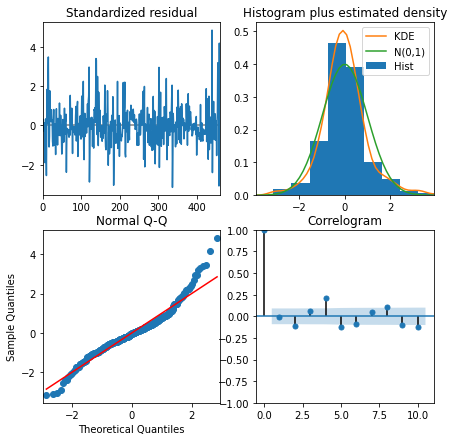

In [ ]:
smodel.plot_diagnostics(figsize=(7,7))
plt.show()

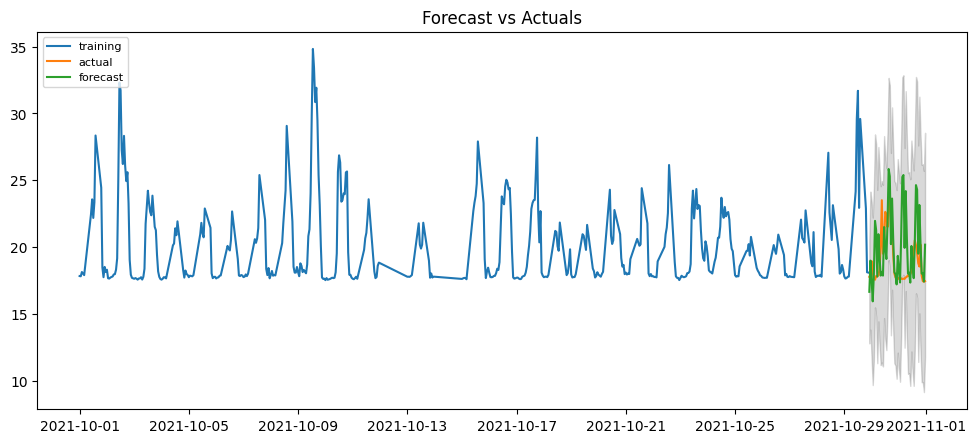

In [ ]:
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = test.index

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [ ]:
forecast_accuracy(fitted, test.values)

{'acf1': 0.745917555733484,
 'corr': 0.336793194784815,
 'mae': 1.9954712509355392,
 'mape': 0.1053629780496824,
 'me': 0.9990991247944553,
 'minmax': 0.09039969140746495,
 'mpe': 0.057266402337125696,
 'rmse': 2.788959727677157}

The seasonality feature incoporated by SARIMA model makes the prediction too flunctuated compared to the actual values. 0.105% MAPE also implied the accuracy of SARIMAX(2,0,1)x(2,1,0,12) is worse than ARIMA(2,0,3). Combined with the lower AIC of ARIMA model, we will probably stick with the ARIMA(2,0,3) to make prediction.

###4.5.3 Cross Validation
To better evaluate two models for time series forecasting, we perform k-fold cross validation, in which sliding window is set to be 24 (120 mins) and prediction horizon is 1 time step (5 mins). The cross validation confirms our assumption that ARIMA(2,0,3) is a better model with lower average SMAPE compared to SARIMA.

In [ ]:
from pmdarima import model_selection
data_cv = travel_time[travel_time['corridor_name'] == '13: Alameda I-80'][['5 Minutes','Mainline Agg']].set_index('5 Minutes')['Mainline Agg']['2021-10-1'].dropna()
data_cv

5 Minutes
2021-10-01 00:00:00    18.40
2021-10-01 00:05:00    18.28
2021-10-01 00:10:00    18.30
2021-10-01 00:15:00    17.97
2021-10-01 00:20:00    17.80
                       ...  
2021-10-01 23:35:00    17.55
2021-10-01 23:40:00    17.55
2021-10-01 23:45:00    17.63
2021-10-01 23:50:00    17.57
2021-10-01 23:55:00    17.77
Name: Mainline Agg, Length: 360, dtype: float64

In [ ]:
train_cv, test_cv = model_selection.train_test_split(data_cv, train_size=280)
cv = model_selection.SlidingWindowForecastCV(window_size=24, step=24, h=1)

In [ ]:
arima_cv_scores = model_selection.cross_val_score(model, train_cv, scoring='smape', cv=cv, verbose=2)
print("ARIMA Model CV scores: {}".format(arima_cv_scores.tolist()))

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
ARIMA Model CV scores: [0.35072842726882797, 1.236574786466871, 3.466083592898031, 0.657610377385056, 50.190229495720374, 0.7865281505973867, 0.13482309416334323, 0.8492025289447473, 1.1948187688340441, 27.2673591161369

In [ ]:
sarima_cv_scores = model_selection.cross_val_score(smodel, train_cv, scoring='smape', cv=cv, verbose=2)
print("SARIMA Model CV scores: {}".format(sarima_cv_scores.tolist()))

[CV] fold=0 ..........................................................
[CV] fold=1 ..........................................................
[CV] fold=2 ..........................................................
[CV] fold=3 ..........................................................
[CV] fold=4 ..........................................................
[CV] fold=5 ..........................................................
[CV] fold=6 ..........................................................
[CV] fold=7 ..........................................................
[CV] fold=8 ..........................................................
[CV] fold=9 ..........................................................
[CV] fold=10 .........................................................
SARIMA Model CV scores: [2.7140207805953267, 2.1216858253280857, 2.7801738387603856, 0.07829497282305395, 50.28411578553238, 3.1534733809897575, 1.7548084447924406, 15.572386322260352, 0.10927198031192495, 27.2374179882

In [ ]:
arima_average_error = np.average(arima_cv_scores)
sarima_average_error = np.average(sarima_cv_scores)
errors = [arima_average_error, sarima_average_error]
models = [model, smodel]
better_index = np.argmin(errors) 
print("Lowest average SMAPE: {}".format(errors[better_index]))
print("Better model: {}".format(models[better_index]))

Lowest average SMAPE: 7.865688503435383
Better model:  ARIMA(2,0,3)(0,0,0)[0] intercept


## 15 Minute

In [37]:
import pmdarima as pm
from statsmodels.tsa.stattools import acf
import random

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

all_corridors_evaluations = []

n_periods = 3
train_size = 48

train_samples = 50

for corridor_id in corridor_ids:

    data = travel_time_df[travel_time_df['corridor_id'] == corridor_id]["Mainline_tt"].dropna()

    length = data.size
    true_value = []
    predict_value = []
    
    for i in range(train_samples):
    
      split_idx = random.randint(0, round(length - train_size - 20))

      train = data[split_idx : split_idx + train_size] 
      test = data[split_idx + train_size : split_idx + train_size + n_periods]

      try:
        model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=7,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        

      except:
        continue
        
      clear_output(wait=True)
      fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
      predict_value.append(fc[train_size + n_periods -1])
      true_value.append(test.values[-1])

    evaluations = forecast_accuracy(np.array(predict_value), np.array(true_value))
    all_corridors_evaluations.append([corridor_id, evaluations["rmse"] , evaluations["mae"], evaluations["mape"]])
=ujik  
df = pd.DataFrame(all_corridors_evaluations, columns =['corridor_id',  'rmse', 'mae', 'mape'])
df = df.loc[~(df==0).all(axis=1)]
df.to_csv("/content/drive/MyDrive/CIS 545 Project Folder/Data Set/SARIMA_records_15min.csv")
df[['rmse', 'mae', 'mape']].mean(axis=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


rmse    0.865152
mae     0.327110
mape    0.022473
dtype: float64

## 30 Minute

In [38]:
import pmdarima as pm
from statsmodels.tsa.stattools import acf
import random

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

all_corridors_evaluations = []

n_periods = 6
train_size = 48

train_samples = 50

for corridor_id in corridor_ids:

    data = travel_time_df[travel_time_df['corridor_id'] == corridor_id]["Mainline_tt"].dropna()

    length = data.size
    true_value = []
    predict_value = []
    
    for i in range(train_samples):
    
      split_idx = random.randint(0, round(length - train_size - 20))

      train = data[split_idx : split_idx + train_size] 
      test = data[split_idx + train_size : split_idx + train_size + n_periods]

      try:
        model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=7,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        

      except:
        continue
      clear_output(wait=True)
      fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
      predict_value.append(fc[train_size + n_periods -1])
      true_value.append(test.values[-1])

    evaluations = forecast_accuracy(np.array(predict_value), np.array(true_value))
    all_corridors_evaluations.append([corridor_id, evaluations["rmse"] , evaluations["mae"], evaluations["mape"]])

df = pd.DataFrame(all_corridors_evaluations, columns =['corridor_id',  'rmse', 'mae', 'mape'])
df = df.loc[~(df==0).all(axis=1)]
df.to_csv("/content/drive/MyDrive/CIS 545 Project Folder/Data Set/SARIMA_records_30min.csv")
df[['rmse', 'mae', 'mape']].mean(axis=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


rmse    1.381507
mae     0.554435
mape    0.037594
dtype: float64

## 45 Minute

In [39]:
import pmdarima as pm
from statsmodels.tsa.stattools import acf
import random

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

all_corridors_evaluations = []

n_periods = 9
train_size = 48

train_samples = 50

for corridor_id in corridor_ids:

    data = travel_time_df[travel_time_df['corridor_id'] == corridor_id]["Mainline_tt"].dropna()

    length = data.size
    true_value = []
    predict_value = []
    
    for i in range(train_samples):
    
      split_idx = random.randint(0, round(length - train_size - 20))

      train = data[split_idx : split_idx + train_size] 
      test = data[split_idx + train_size : split_idx + train_size + n_periods]

      try:
        model = pm.auto_arima(train, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=7,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False, start_P = 1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
        

      except:
        continue
      
      clear_output(wait=True)
      fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) 
      predict_value.append(fc[train_size + n_periods -1])
      true_value.append(test.values[-1])

    evaluations = forecast_accuracy(np.array(predict_value), np.array(true_value))
    all_corridors_evaluations.append([corridor_id, evaluations["rmse"] , evaluations["mae"], evaluations["mape"]])

df = pd.DataFrame(all_corridors_evaluations, columns =['corridor_id',  'rmse', 'mae', 'mape'])
df = df.loc[~(df==0).all(axis=1)]
df.to_csv("/content/drive/MyDrive/CIS 545 Project Folder/Data Set/SARIMA_records_45min.csv")
df[['rmse', 'mae', 'mape']].mean(axis=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


rmse    1.996961
mae     0.755375
mape    0.055136
dtype: float64

#References


1.   https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775
2.   https://towardsdatascience.com/pollution-forecasting-using-time-series-and-lstm-with-mxnet-16fe9180ee1
3.   Celikoglu, H. (n.d.). Flow-Based Freeway Travel-Time Estimation: A Comparative Evaluation Within Dynamic Path Loading. IEEE Trans. Intell. Transport. Syst., 14(2), pp.772-781.
4.   Chen, G., Teng, J., Zhang, S. and Yang, X. (2013). Tendency-Based Approach for Link Travel Time Estimation. J. Transp. Eng., 139(4), pp.350-357.
5.   Huang, Y., Xu, L., Luo, Q. and Kuang, X. (2013). Urban Expressway Travel Time Prediction Method Based on Fuzzy Adaptive Kalman Filter. Applied Mathematics & Information Sciences, 7(2L), pp.625-630.
6.   Wang, Y., Papageorgiou, M. and Messmer, A. (2008). Real-time freeway traffic state estimation based on extended Kalman filter: Adaptive capabilities and real data testing. Transportation Research Part A: Policy and Practice, 42(10), pp.1340-1358.





